# Scraping and Analyzing Airline Reviews
# Overview:
In This notebook scrapes reviews of British Airways from Airline Quality and performs sentiment analysis on the gathered data. The notebook also creates visualizations, including a sentiment distribution pie chart and word clouds for positive reviews and negative reviews.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
!pip install nltk
!pip install vaderSentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer

# Data Collection with beautiful soap



In [ ]:
reviews  = []

In [ ]:
reviews = []

for i in range(1, 31):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")

    soup = BeautifulSoup(page.content, "html5")

    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)



In [ ]:
len(reviews)

3000

In [ ]:

df = pd.DataFrame({
    'reviews': reviews
})

df['id'] = df.reset_index().index + 1

print(df.head())


                                             reviews  id
0  ✅ Trip Verified | I am a British Airways Gold ...   1
1  Not Verified |  Another case of reviewing Brit...   2
2  ✅ Trip Verified | On the memorable day of Janu...   3
3  Not Verified | I did not actually get to fly w...   4
4  ✅ Trip Verified | We had possibly the worse ch...   5


# Data Cleaning

In [ ]:
df = df[df['reviews'].notna()]
df['reviews'] = df['reviews'].str.replace('\n', ' ')
df['reviews'] = df['reviews'].str.replace('\t', ' ')
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')
df['reviews'] = df['reviews'].str.lower()

stop_words = set(stopwords.words('english'))
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

remove_words = ['trip', 'verified', 'unverified', 'ba', 'british', 'airways']
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in remove_words]))


print(df.head())


<ipython-input-71-109a493d9c5f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('[^a-zA-Z\s]', '')


                                             reviews  id
0  gold guest list member lifetime privileges spi...   1
1  another case reviewing flights actually provid...   2
2  memorable day january th family embarked journ...   3
3  actually get fly cancelled flight days notice ...   4
4  possibly worse checkin experience ever ever to...   5


# Sentiment Analysis

In [ ]:
sia = SentimentIntensityAnalyzer()
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviews']
    id = row['id']
    res[id] = sia.polarity_scores(text)

100%|██████████| 3000/3000 [00:07<00:00, 406.76it/s]


In [ ]:
res

{1: {'neg': 0.126, 'neu': 0.701, 'pos': 0.173, 'compound': 0.7269},
 2: {'neg': 0.024, 'neu': 0.853, 'pos': 0.123, 'compound': 0.7942},
 3: {'neg': 0.017, 'neu': 0.736, 'pos': 0.247, 'compound': 0.9923},
 4: {'neg': 0.227, 'neu': 0.648, 'pos': 0.125, 'compound': -0.4767},
 5: {'neg': 0.111, 'neu': 0.717, 'pos': 0.172, 'compound': 0.7069},
 6: {'neg': 0.025, 'neu': 0.68, 'pos': 0.295, 'compound': 0.9584},
 7: {'neg': 0.035, 'neu': 0.715, 'pos': 0.25, 'compound': 0.959},
 8: {'neg': 0.03, 'neu': 0.97, 'pos': 0.0, 'compound': -0.0258},
 9: {'neg': 0.127, 'neu': 0.736, 'pos': 0.137, 'compound': 0.5542},
 10: {'neg': 0.366, 'neu': 0.476, 'pos': 0.158, 'compound': -0.8916},
 11: {'neg': 0.112, 'neu': 0.774, 'pos': 0.114, 'compound': 0.296},
 12: {'neg': 0.06, 'neu': 0.7, 'pos': 0.24, 'compound': 0.9349},
 13: {'neg': 0.122, 'neu': 0.72, 'pos': 0.158, 'compound': 0.7096},
 14: {'neg': 0.064, 'neu': 0.82, 'pos': 0.116, 'compound': 0.8487},
 15: {'neg': 0.305, 'neu': 0.66, 'pos': 0.035, 'compou

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,id,neg,neu,pos,compound,reviews
0,1,0.126,0.701,0.173,0.7269,gold guest list member lifetime privileges spi...
1,2,0.024,0.853,0.123,0.7942,another case reviewing flights actually provid...
2,3,0.017,0.736,0.247,0.9923,memorable day january th family embarked journ...
3,4,0.227,0.648,0.125,-0.4767,actually get fly cancelled flight days notice ...
4,5,0.111,0.717,0.172,0.7069,possibly worse checkin experience ever ever to...


# Visualization

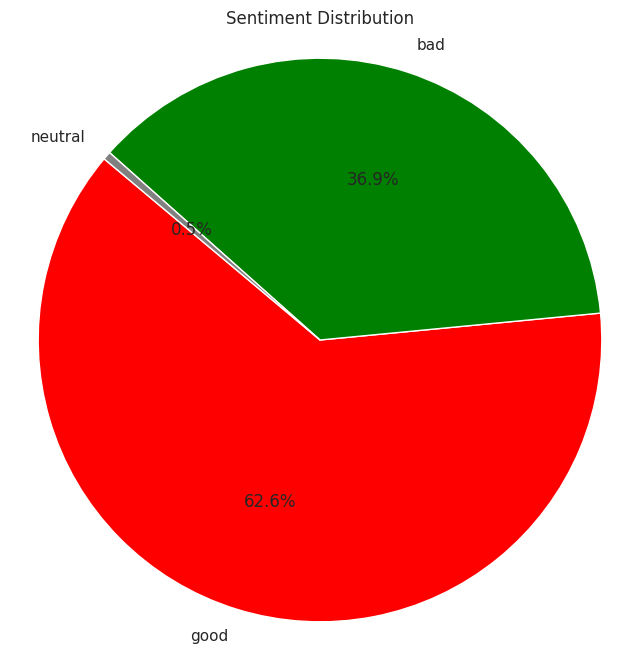

<Figure size 800x800 with 0 Axes>

In [ ]:
colors = ['red', 'green', 'grey']
sentiment_counts = vaders['compound'].apply(lambda x: 'bad' if x < 0 else 'neutral' if x == 0 else 'good').value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.figure(figsize=(8, 8), facecolor='black')

plt.show()

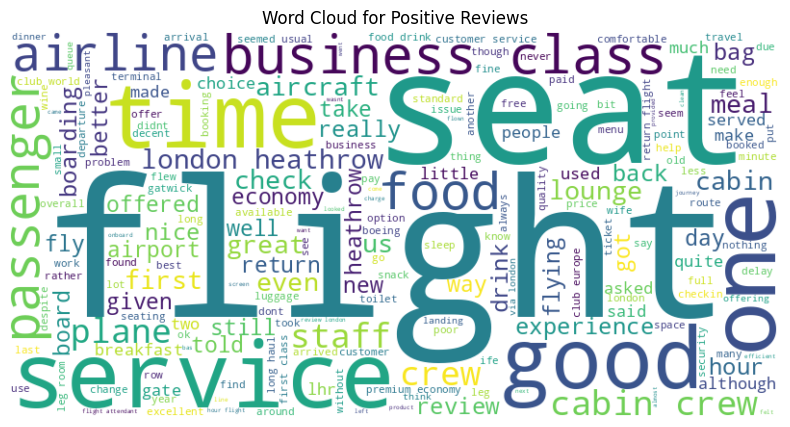

In [ ]:

positive_reviews = vaders[vaders['compound'] > 0]['reviews'].astype(str)

all_positive_reviews = ' '.join(positive_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', color='black')
plt.show()

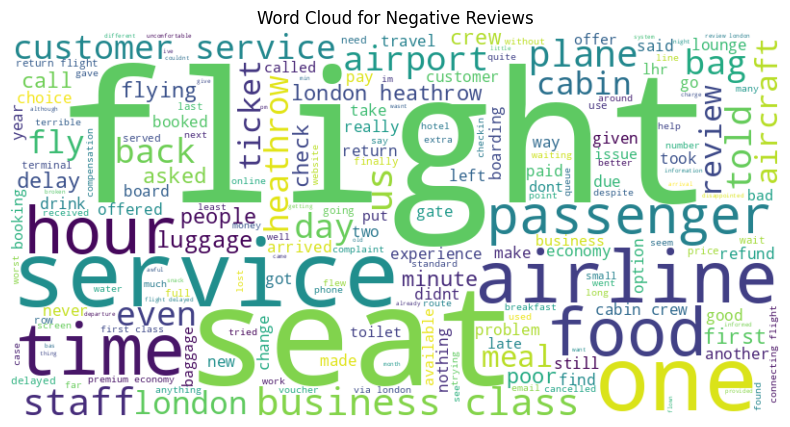

In [ ]:
negative_reviews = vaders[vaders['compound'] < 0]['reviews'].astype(str)

all_negative_reviews = ' '.join(negative_reviews)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', color='black')
plt.show()

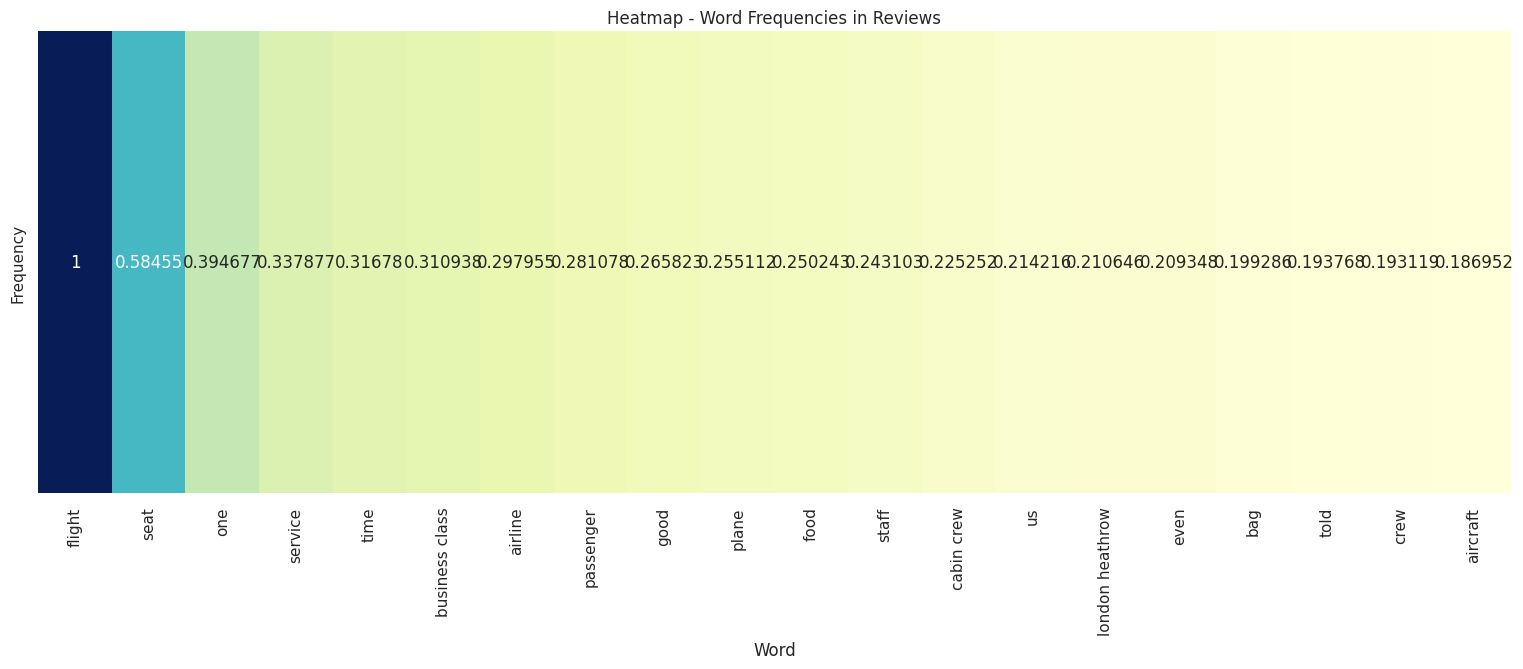

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

all_reviews_text = ' '.join(df['reviews'])

wordcloud_all_reviews = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

word_frequencies = wordcloud_all_reviews.words_

heatmap_data = pd.DataFrame(list(word_frequencies.items()), columns=['Word', 'Frequency'])

heatmap_data = heatmap_data.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(19, 6))
sns.heatmap(heatmap_data.head(20).set_index('Word').T, cmap='YlGnBu', annot=True, fmt="g", cbar=False)
plt.title('Heatmap - Word Frequencies in Reviews')
plt.show()



# Conclusion
In our exploration of customer reviews, the visualizations played a crucial role in uncovering meaningful patterns and trends.







1. The pie chart shows us the percentage of each category of reviews. This positive skew is a good indicator of overall customer satisfaction.


2. The word cloud for reviews shows the most frequently used words in content in both positive and negative sentiment, which will help us a lot to know what the most frequently used words are in the reviews, whether they are good or bad, so the company puts more effort into these things to achieve more customer satisfaction.


3. The heatmap is based on word frequencies in all reviews. The benefit of it is the same as a word cloud, but it allows us to view more words only.


